```
    _/    _/  _/_/_/  _/       Numerical Simulation Laboratory
   _/_/  _/ _/       _/       Physics Department
  _/  _/_/    _/    _/       Universita' degli Studi di Milano
 _/    _/       _/ _/       Prof. D.E. Galli
_/    _/  _/_/_/  _/_/_/_/ email: Davide.Galli@unimi.it
```

# Lesson 6

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

## Exercise 6.1

In this exercise, we simulate the 1D Ising model using two different techniques.

In [62]:
metro_data = []
metro_internal_energy = []
metro_heat_capacity = []
metro_magnetization = []
metro_susceptivity = []
gibbs_data = []
gibbs_internal_energy = []
gibbs_heat_capacity = []
gibbs_magnetization = []
gibbs_susceptivity = []

for i in range(20):
    temp = 0.5 + i * 1.5/20.
    d = np.loadtxt(f"data/6.1-metro-{temp}.dat")
    metro_internal_energy.append(blocks_value(d[:, 0]))
    metro_heat_capacity.append(blocks_value(d[:, 1] - internal_energy[i][:, 0] * internal_energy[i][:, 0] * 50) / (temp * temp))
    metro_magnetization.append(blocks_value(d[:, 2]))
    metro_susceptivity.append(blocks_value(d[:, 3]))
    metro_data.append(d)
    d = np.loadtxt(f"data/6.1-gibbs-{temp}.dat")
    gibbs_internal_energy.append(blocks_value(d[:, 0]))
    gibbs_heat_capacity.append(blocks_value(d[:, 1] - internal_energy[i][:, 0] * internal_energy[i][:, 0] * 50) / (temp * temp))
    gibbs_magnetization.append(blocks_value(d[:, 2]))
    gibbs_susceptivity.append(blocks_value(d[:, 3]))
    gibbs_data.append(d)

metro_internal_energy = np.array(metro_internal_energy)
metro_heat_capacity = np.array(metro_heat_capacity)
metro_magnetization = np.array(metro_magnetization)
metro_susceptivity = np.array(metro_susceptivity)
gibbs_internal_energy = np.array(gibbs_internal_energy)
gibbs_heat_capacity = np.array(gibbs_heat_capacity)
gibbs_magnetization = np.array(gibbs_magnetization)
gibbs_susceptivity = np.array(gibbs_susceptivity)

At first, we plot the block values for the Metropolis simulation at $T=0.5$.

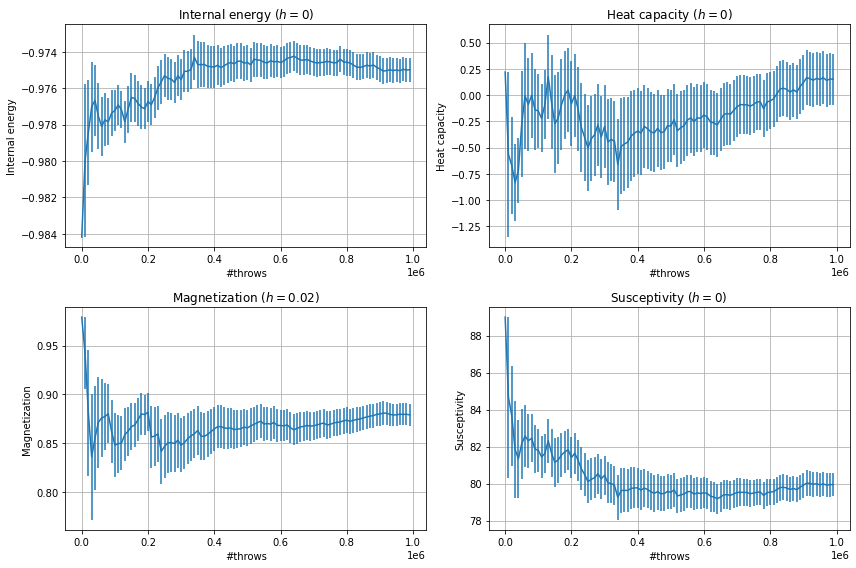

In [63]:
x = np.arange(100) * 10000
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.grid()
plt.errorbar(x, metro_internal_energy[0, :, 0], yerr=internal_energy[0, :, 1])
plt.title("Internal energy ($h = 0$)")
plt.xlabel("#throws")
plt.ylabel("Internal energy")

plt.subplot(2, 2, 2)
plt.grid()
plt.errorbar(x, metro_heat_capacity[0, :, 0], yerr=heat_capacity[0, :, 1])
plt.title("Heat capacity ($h = 0$)")
plt.xlabel("#throws")
plt.ylabel("Heat capacity")

plt.subplot(2, 2, 3)
plt.grid()
plt.errorbar(x, metro_magnetization[0, :, 0], yerr=metro_magnetization[0, :, 1])
plt.title("Magnetization ($h = 0.02$)")
plt.xlabel("#throws")
plt.ylabel("Magnetization")

plt.subplot(2, 2, 4)
plt.grid()
plt.errorbar(x, metro_susceptivity[0, :, 0], yerr=metro_susceptivity[0, :, 1])
plt.title("Susceptivity ($h = 0$)")
plt.xlabel("#throws")
plt.ylabel("Susceptivity")

plt.tight_layout()
plt.show();

Then we plot the same, for the Gibbs sampling.

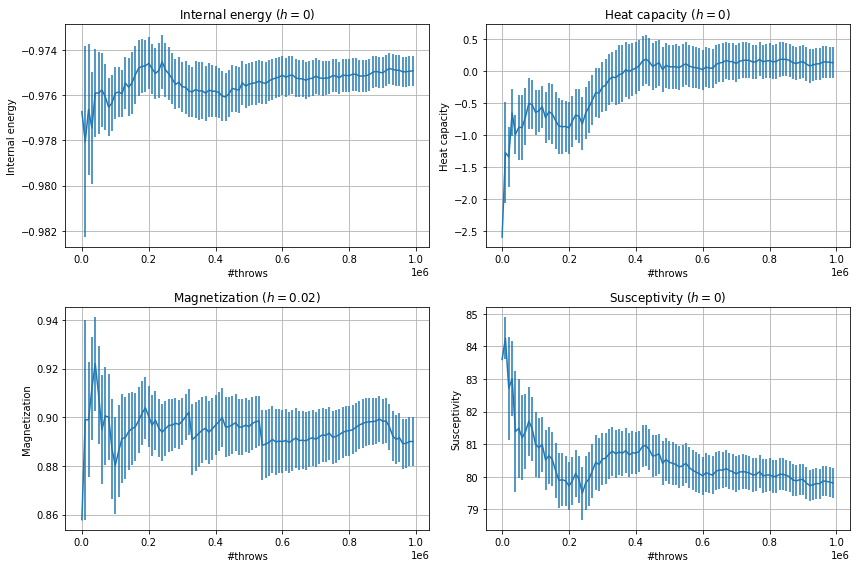

In [64]:
x = np.arange(100) * 10000
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.grid()
plt.errorbar(x, gibbs_internal_energy[0, :, 0], yerr=internal_energy[0, :, 1])
plt.title("Internal energy ($h = 0$)")
plt.xlabel("#throws")
plt.ylabel("Internal energy")

plt.subplot(2, 2, 2)
plt.grid()
plt.errorbar(x, gibbs_heat_capacity[0, :, 0], yerr=heat_capacity[0, :, 1])
plt.title("Heat capacity ($h = 0$)")
plt.xlabel("#throws")
plt.ylabel("Heat capacity")

plt.subplot(2, 2, 3)
plt.grid()
plt.errorbar(x, gibbs_magnetization[0, :, 0], yerr=gibbs_magnetization[0, :, 1])
plt.title("Magnetization ($h = 0.02$)")
plt.xlabel("#throws")
plt.ylabel("Magnetization")

plt.subplot(2, 2, 4)
plt.grid()
plt.errorbar(x, gibbs_susceptivity[0, :, 0], yerr=gibbs_susceptivity[0, :, 1])
plt.title("Susceptivity ($h = 0$)")
plt.xlabel("#throws")
plt.ylabel("Susceptivity")

plt.tight_layout()
plt.show();

Finally, we plot the studied properties as a function of the temperature, calculated theoretically, with Metropolis and with Gibbs.

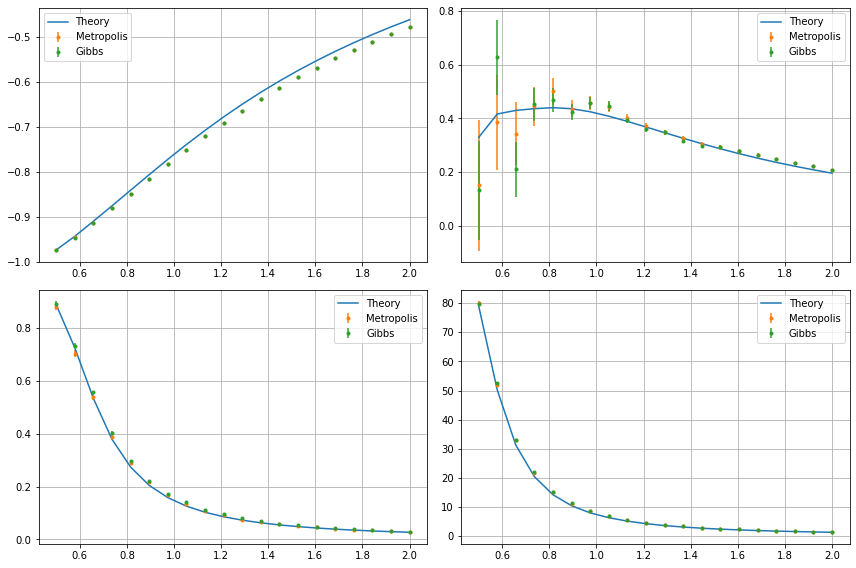

In [67]:
plt.figure(figsize=(12, 8))

T = np.linspace(0.5, 2., 20)
beta = 1/T

# Internal energy
plt.subplot(2, 2, 1)
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.grid()
plt.plot(T, e, label="Theory")
plt.errorbar(T, metro_internal_energy[:, -1, 0], yerr=metro_internal_energy[:, -1, 1], marker=".", ls="none", label="Metropolis")
plt.errorbar(T, gibbs_internal_energy[:, -1, 0], yerr=metro_internal_energy[:, -1, 1], marker=".", ls="none", label="Gibbs")
plt.legend()

# Heat capacity
plt.subplot(2, 2, 2)
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.grid()
plt.plot(T, heat, label="Theory")
plt.errorbar(T, metro_heat_capacity[:, -1, 0], yerr=metro_heat_capacity[:, -1, 1], marker=".", ls="none", label="Metropolis")
plt.errorbar(T, gibbs_heat_capacity[:, -1, 0], yerr=gibbs_heat_capacity[:, -1, 1], marker=".", ls="none", label="Gibbs")
plt.legend()
plt.savefig("lel.png")

# Magnetization
plt.subplot(2, 2, 3)
h=0.02 #external field
l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
M = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)
plt.grid()
plt.plot(T, M, label="Theory")
plt.errorbar(T, metro_magnetization[:, -1, 0], yerr=metro_magnetization[:, -1, 1], marker=".", ls="none", label="Metropolis")
plt.errorbar(T, gibbs_magnetization[:, -1, 0], yerr=gibbs_magnetization[:, -1, 1], marker=".", ls="none", label="Gibbs")
plt.legend()

plt.subplot(2, 2, 4)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.grid()
plt.plot(T, X, label="Theory")
plt.errorbar(T, metro_susceptivity[:, -1, 0], yerr=metro_susceptivity[:, -1, 1], marker=".", ls="none", label="Metropolis")
plt.errorbar(T, gibbs_susceptivity[:, -1, 0], yerr=gibbs_susceptivity[:, -1, 1], marker=".", ls="none", label="Gibbs")
plt.legend()

plt.tight_layout()
plt.show();